- The outputs from the pest analysis is analyzed here. The following notebook provides a template for future notebooks.

File name - Case1_B_glm_rw_restart2.demo {Simulation is carried out with 20 parameters (10 for each material) }

1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU) - - Check from Pg. 100 - pestpp.5.0.8_manual.pdf
    - Input data
    - Sensitivity
    - Objective function
    - Residuals
    - Relative contribution of temperature and moisture on the objective function
    - Identifibility tool (TODO)
    - Covariance matrix (TODO)

In [1]:
import sys
sys.path.insert(0,'../pestools')

In [2]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/home/rk/pestpp/pestpp/rk_model_final


In [4]:
from matplotlib.ticker import MaxNLocator
#import parsen

/home/rk/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

/home/rk/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
import warnings
warnings.filterwarnings('ignore')

/home/rk/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU)
#### a. Started with accessing the input data

In [7]:
directory_name = 'Case5_II_A_glm_rw.demo'
cf_name = 'Case5_II_A_glm_cf_v1_rw' # Control file name

#### b. Parameter Sensitivity 

In [8]:
sen_iteration = pd.read_csv(f'{directory_name}/{cf_name}.isen')
sen_iteration.index = sen_iteration['iteration']
sen_iteration.drop(axis=1, columns=['iteration'], inplace=True)
sen_iteration

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,perm_p,perm_m,den_p,den_m,albedo_bg,e_bg,pen_w,pen_s,z_bg,z_s
iteration,,,,,,,,,,,,,,,,,,,,,
1,0.000591,0.009493,0.000028,0.000024,0.000104,0.000100,0.000060,0.000007,0.000041,0.000004,...,91667.4,39121100.0,4.418080e-09,1.868390e-09,0.000038,0.000057,2.259120e-06,0.000193,0.000178,0.000806
2,0.000950,0.008717,0.000021,0.000022,0.000069,0.000087,0.000051,0.000007,0.000033,0.000003,...,69059.1,21935300.0,5.787820e-10,2.285400e-09,0.000039,0.000056,5.672070e-07,0.000073,0.000133,0.000306
3,0.001752,0.005064,0.000018,0.000020,0.000063,0.000085,0.000043,0.000006,0.000023,0.000002,...,68990.2,26498200.0,3.812160e-09,3.058370e-09,0.000039,0.000055,5.849520e-07,0.000180,0.000119,0.001078
4,0.002231,0.006937,0.000020,0.000019,0.000060,0.000078,0.000045,0.000006,0.000043,0.000004,...,69748.3,10954800.0,3.087850e-09,1.886780e-09,0.000036,0.000047,5.865780e-05,0.000177,0.000119,0.000628
5,0.002790,0.006540,0.000020,0.000020,0.000055,0.000082,0.000044,0.000006,0.000041,0.000005,...,90467.8,13155100.0,6.545770e-09,2.404660e-09,0.000036,0.000045,2.249820e-04,0.000246,0.000131,0.000788


In [9]:
len(sen_iteration.columns.values)

26

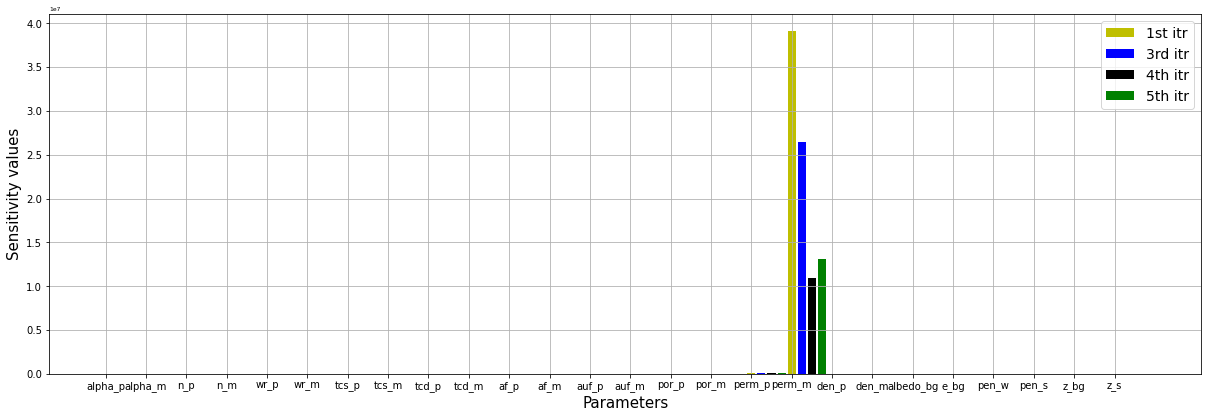

In [10]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(26) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, sen_iteration.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, sen_iteration.iloc[2,:], color='b', label='3rd itr', width=0.2)
ax.bar(X + 0.5, sen_iteration.iloc[3,:], color='k', label='4th itr', width=0.2)
ax.bar(X + 0.75, sen_iteration.iloc[4,:], color='g', label='5th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

##### Relative sensitivity values

In [11]:
sen_iteration.iloc[0,:].max()

39121100.0

In [12]:
relative_set_itr = sen_iteration.copy()
for i, value in enumerate(sen_iteration.index):
    relative_set_itr.iloc[i,:] = relative_set_itr.iloc[0,:]/relative_set_itr.iloc[0,:].max()

relative_set_itr

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,perm_p,perm_m,den_p,den_m,albedo_bg,e_bg,pen_w,pen_s,z_bg,z_s
iteration,,,,,,,,,,,,,,,,,,,,,
1,1.510157e-11,2.426624e-10,7.076616e-13,6.105989e-13,2.655830e-12,2.563859e-12,1.524776e-12,1.804599e-13,1.036369e-12,9.232537e-14,...,0.002343,1.0,1.129334e-16,4.775914e-17,9.762456e-13,1.461339e-12,5.774684e-14,4.934626e-12,4.561579e-12,2.059088e-11
2,1.510157e-11,2.426624e-10,7.076616e-13,6.105989e-13,2.655830e-12,2.563859e-12,1.524776e-12,1.804599e-13,1.036369e-12,9.232537e-14,...,0.002343,1.0,1.129334e-16,4.775914e-17,9.762456e-13,1.461339e-12,5.774684e-14,4.934626e-12,4.561579e-12,2.059088e-11
3,1.510157e-11,2.426624e-10,7.076616e-13,6.105989e-13,2.655830e-12,2.563859e-12,1.524776e-12,1.804599e-13,1.036369e-12,9.232537e-14,...,0.002343,1.0,1.129334e-16,4.775914e-17,9.762456e-13,1.461339e-12,5.774684e-14,4.934626e-12,4.561579e-12,2.059088e-11
4,1.510157e-11,2.426624e-10,7.076616e-13,6.105989e-13,2.655830e-12,2.563859e-12,1.524776e-12,1.804599e-13,1.036369e-12,9.232537e-14,...,0.002343,1.0,1.129334e-16,4.775914e-17,9.762456e-13,1.461339e-12,5.774684e-14,4.934626e-12,4.561579e-12,2.059088e-11
5,1.510157e-11,2.426624e-10,7.076616e-13,6.105989e-13,2.655830e-12,2.563859e-12,1.524776e-12,1.804599e-13,1.036369e-12,9.232537e-14,...,0.002343,1.0,1.129334e-16,4.775914e-17,9.762456e-13,1.461339e-12,5.774684e-14,4.934626e-12,4.561579e-12,2.059088e-11


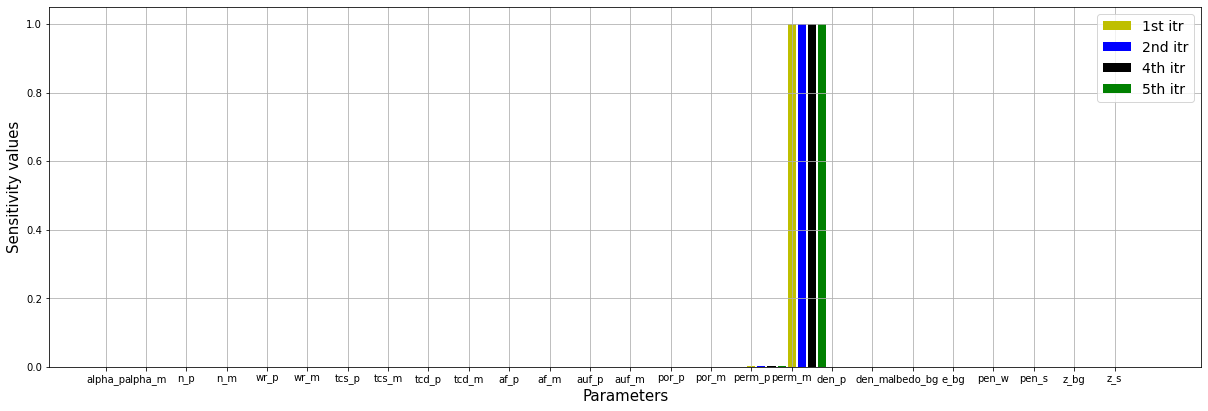

In [13]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(26) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, relative_set_itr.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, relative_set_itr.iloc[1,:], color='b', label='2nd itr', width=0.2)
ax.bar(X + 0.5, relative_set_itr.iloc[3,:], color='k', label='4th itr', width=0.2)
ax.bar(X + 0.75, relative_set_itr.iloc[4,:], color='g', label='5th itr', width=0.2)



#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

Comments:
    * The sensitivity of the parameters also depends on the lower and upper bounds - If the upper and lower bounds are provided with varying degree of change with respect to the initial value, then the parameter might also have a greater sensitivity. 
    * Next time - Fix the lower and upper bounds and check how the results change! - Try with the new parameter values! - Also add latent heat

### Plotting the change in parameters:


In [14]:
par_iteration = pd.read_csv(f'{directory_name}/{cf_name}.ipar')
par_iteration.index = par_iteration['iteration']
par_iteration.drop(axis=1, columns=['iteration'], inplace=True)
par_iteration

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,perm_p,perm_m,den_p,den_m,albedo_bg,e_bg,pen_w,pen_s,z_bg,z_s
iteration,,,,,,,,,,,,,,,,,,,,,
0,0.010000,0.001825,1.50000,2.05000,0.100000,0.159488,0.439577,0.952105,0.101023,0.984405,...,5.346620e-11,1.000000e-13,900,1900,0.550000,0.750000,0.010000,0.020000,0.040000,0.005000
1,0.004941,0.001992,1.50227,2.05552,0.117054,0.159901,0.449234,0.949849,0.104198,0.984608,...,3.285550e-11,1.750000e-13,900,1900,0.556672,0.765968,0.010233,0.025167,0.042792,0.003838
2,0.003261,0.002174,1.50076,2.05874,0.132529,0.154936,0.465040,0.945019,0.116344,0.984341,...,3.327930e-11,1.750000e-13,900,1900,0.565302,0.788971,0.010210,0.022587,0.045244,0.002570
3,0.002500,0.002126,1.49992,2.06126,0.146029,0.163287,0.478836,0.941909,0.115051,0.984066,...,4.273340e-11,1.716530e-13,900,1900,0.570947,0.803589,0.010159,0.013954,0.045707,0.003459
4,0.002500,0.002120,1.49992,2.06126,0.146029,0.163288,0.478836,0.941909,0.115051,0.984066,...,4.273060e-11,1.750000e-13,900,1900,0.570947,0.803589,0.010159,0.013954,0.045707,0.003457
5,0.002500,0.001661,1.48459,2.05749,0.156116,0.173485,0.491955,0.938164,0.120658,0.984400,...,5.242240e-11,1.750000e-13,900,1900,0.569792,0.802868,0.010623,0.014505,0.046967,0.003135


##### Changing the parameters relative to the initial value
- To ensure that we can plot the changes with respect to the parameters, we subtract the parameter values w.r.t the initial values and then multiply by 100.
\begin{equation}
    par_{change} = \frac{(par_{final} - par_{initial})}{par_{initial}} * 100
\end{equation}

In [15]:
par_change = par_iteration.copy()
#pargp_initial = par_change.iloc[0,:]
for i, index_value in enumerate(par_change.index):
    for j, col_value in enumerate(par_change.columns):
        #print(i, j)
        #print(par_change.iloc[i,j])
        par_change.iloc[i,j] = (par_iteration.iloc[i,j] - par_iteration.iloc[0,j])/par_iteration.iloc[0,j]*100
#np.abs(par_change)
par_change

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,...,perm_p,perm_m,den_p,den_m,albedo_bg,e_bg,pen_w,pen_s,z_bg,z_s
iteration,,,,,,,,,,,,,,,,,,,,,
0,0.0000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0,0,0.000000,0.000000,0.000,0.0000,0.0000,0.0000
1,-50.5881,9.170863,0.151333,0.269268,17.054,0.258954,2.196885,-0.236949,3.142849,0.020622,...,-38.549027,75.000,0,0,1.213091,2.129067,2.329,25.8360,6.9805,-23.2412
2,-67.3886,19.128615,0.050667,0.426341,32.529,-2.854133,5.792614,-0.744246,15.165853,-0.006501,...,-37.756377,75.000,0,0,2.782182,5.196133,2.104,12.9345,13.1095,-48.5968
3,-75.0000,16.473689,-0.005333,0.549268,46.029,2.381997,8.931086,-1.070890,13.885947,-0.034437,...,-20.073991,71.653,0,0,3.808545,7.145200,1.588,-30.2295,14.2670,-30.8272
4,-75.0000,16.194771,-0.005333,0.549268,46.029,2.382624,8.931086,-1.070890,13.885947,-0.034437,...,-20.079228,75.000,0,0,3.808545,7.145200,1.587,-30.2300,14.2665,-30.8578
5,-75.0000,-8.967018,-1.027333,0.365366,56.116,8.776209,11.915546,-1.464229,19.436168,-0.000508,...,-1.952261,75.000,0,0,3.598545,7.049067,6.231,-27.4735,17.4165,-37.3066


#### Line plot of all parameter values


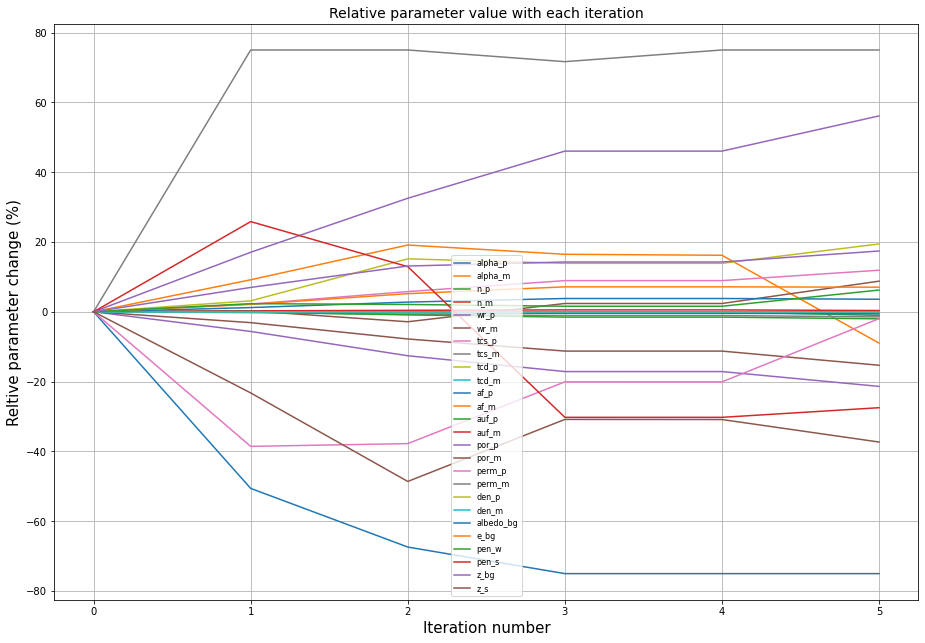

In [16]:
fig = plt.figure()
fig.set_size_inches(12,8)
ax = fig.add_axes([0,0,1,1])

for i, value in enumerate(par_change.columns):
    ax.plot(par_change.iloc[:,i], label=f'{value}')
    

#ax.set_title(f'Relative parameter value with each iteration: Initial values - n_m = {np.round(par_iteration.iloc[0,0],5)}, tcs_m = {np.round(par_iteration.iloc[0,1],5)}, af_m = {np.round(par_iteration.iloc[0,2],5)}, af_p = {np.round(par_iteration.iloc[0,3],5)}', fontsize=14)
ax.set_title(f'Relative parameter value with each iteration',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Iteration number', fontsize=15)
ax.set_ylabel('Reltive parameter change (%)', fontsize=15)
ax.legend(fontsize=8)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

### c. Objective function

In [17]:
no_iteration = np.arange(1,len(par_change.index),1)
no_iteration

array([1, 2, 3, 4, 5])

In [18]:
# Residual files - importing the values from the file
# Residual files after each iteration
no_iteration = np.arange(1,len(par_change.index),1)
for i, value in enumerate(no_iteration):
    locals()[f'res_{value}'] = pd.read_csv(f'{directory_name}/{cf_name}.rei{value}', skiprows=2,delim_whitespace=True)

#res_best = pd.read_csv(f'{directory_name}/rk_model_glm_cf.res', skiprows=2,delim_whitespace=True)
#res_best
res_1.head()

,Name,Group,Measured,Modelled,Residual,Weight
0,stemp_0.04_0,temp,261.0233,270.150000,-9.126700,0.000636
1,stemp_0.04_1,temp,261.0067,269.325587,-8.318887,0.000636
2,stemp_0.04_2,temp,260.8549,268.521045,-7.666145,0.000636
3,stemp_0.04_3,temp,261.0327,267.712169,-6.679469,0.000636
4,stemp_0.04_4,temp,261.3470,266.820846,-5.473846,0.000636


#### Analyzing the residual weights:


In [19]:
res_1['Weight'].describe()

count    5110.000000
mean        0.000389
std         0.000247
min         0.000142
25%         0.000142
50%         0.000389
75%         0.000636
max         0.000636
Name: Weight, dtype: float64

In [20]:
res_1['Weight'].unique()

array([0.00063574, 0.00014178])

In [21]:
# Following the code from line 94 - file : res.py
def obj_fun(rei_df):
    """
    Function defined to calculate the objective function along with the residual values
    
    Input: rei_df - Residual dataframe
    
    
    """
    
    # Apply weighted residual and calculate phi contributions
    rei_df['Weighted_Residual'] = rei_df['Residual'] * rei_df['Weight']
    rei_df['Absolute_Residual'] = abs(rei_df['Residual'])
    rei_df['Weighted_Absolute_Residual'] = rei_df['Absolute_Residual'] * rei_df['Weight']
    
    # Calculate phi
    rei_df['Weighted_Sq_Residual'] = rei_df['Weighted_Residual']**2
    
    # Percentage contribution by each observation
    rei_df['Phi_Percent'] = rei_df['Weighted_Sq_Residual']/(rei_df['Weighted_Sq_Residual'].sum())*100
    
    return rei_df

In [22]:
# Finding the variation of residuals
for i, value in enumerate(no_iteration):
    locals()[f'res_phi_{value}'] = obj_fun(locals()[f'res_{value}'])
    
#res_phi_1 = obj_fun(res_1)
res_phi_1.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,261.0233,270.150000,-9.126700,0.000636,-0.005802,9.126700,0.005802,0.000034,0.390002
1,stemp_0.04_1,temp,261.0067,269.325587,-8.318887,0.000636,-0.005289,8.318887,0.005289,0.000028,0.324019
2,stemp_0.04_2,temp,260.8549,268.521045,-7.666145,0.000636,-0.004874,7.666145,0.004874,0.000024,0.275165
3,stemp_0.04_3,temp,261.0327,267.712169,-6.679469,0.000636,-0.004246,6.679469,0.004246,0.000018,0.208893
4,stemp_0.04_4,temp,261.3470,266.820846,-5.473846,0.000636,-0.003480,5.473846,0.003480,0.000012,0.140289


In [23]:
res_phi_1['Weighted_Sq_Residual'].mean()

1.6892844683142313e-06

In [24]:
# Defining a dataframe with a objective function
# Changing the units by multiplying by 1e6

objfn_phi = pd.DataFrame(index=no_iteration,columns=['obj_func'])

for i, value in enumerate(no_iteration):
    objfn_phi.iloc[i,0] = locals()[f'res_phi_{i+1}']['Weighted_Sq_Residual'].mean()*1e7

objfn_phi.head()

,obj_func
1,16.892845
2,14.514312
3,13.272637
4,13.230731
5,12.263613


In [25]:
#fig, ax = plt.subplots(figsize=(14, 6))

#plt.figure(figsize=(10, 6))
#ax.plot(objfn_phi['obj_func'])
#ax.set_title('Plotting objective function with each iteration ', fontsize=15)
#ax.set_ylabel('Objective function (*1e7)', fontsize=12)
#ax.set_xlabel('Iteration number', fontsize=12)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.grid()

The values were calculated using a formula. It not the same as the objective function calculated by the PEST program!

Comments:
    
* It shows here that the second iteration has the least objective function value

How to determine the parameter dataset and residual values with the best dataset?

#### Accessing the objective function with every iteration 

In [26]:
obj_iteration = pd.read_csv(f'{directory_name}/{cf_name}.iobj')
#obj_iteration.index = par_iteration['iteration']
obj_iteration.drop(axis=1, columns=['iteration'], inplace=True)
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.010244,0.010244,0,0.005122,0.005122
1,37,0.008632,0.008632,0,0.004833,0.003799
2,73,0.007417,0.007417,0,0.004520,0.002897
3,109,0.006782,0.006782,0,0.004345,0.002437
4,171,0.006761,0.006761,0,0.004342,0.002419
5,233,0.006267,0.006267,0,0.004248,0.002018


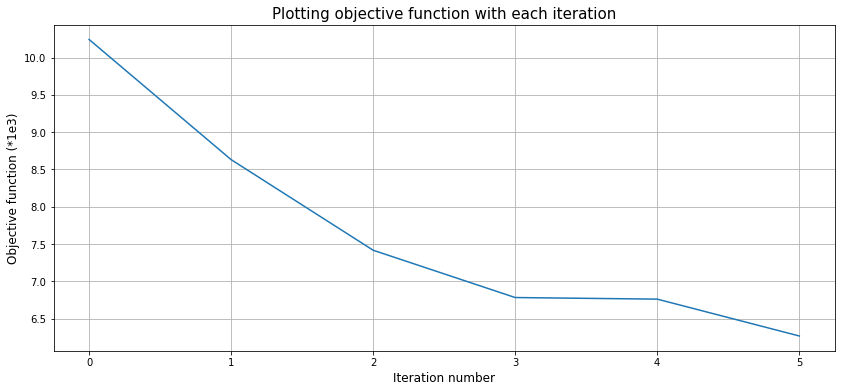

<Figure size 720x432 with 0 Axes>

In [27]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.figure(figsize=(10, 6))
ax.plot(obj_iteration['total_phi']*1e3)
ax.set_title('Plotting objective function with each iteration', fontsize=15)
ax.set_ylabel('Objective function (*1e3)', fontsize=12)
ax.set_xlabel('Iteration number', fontsize=12)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

**Comments:**
- The objective function is reducing with each iteration.

### d. Residuals
1. First choose the iteration with the minimum objective function value.
2. Then plot the residual based on this iteration

In [28]:
obj_iteration['total_phi'].idxmin()
# The iteration with the minimum objective function

5

In [29]:
# Finding the index where we will be encountering the minimum objective function
itrno_best = obj_iteration['total_phi'].idxmin()

# Finding the corresponding residuals
res_best = locals()[f'res_{itrno_best}'].copy()

res_best.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,261.0233,270.150000,-9.126700,0.000636,-0.005802,9.126700,0.005802,0.000034,0.537219
1,stemp_0.04_1,temp,261.0067,269.349174,-8.342474,0.000636,-0.005304,8.342474,0.005304,0.000028,0.448863
2,stemp_0.04_2,temp,260.8549,268.564169,-7.709269,0.000636,-0.004901,7.709269,0.004901,0.000024,0.383310
3,stemp_0.04_3,temp,261.0327,267.770948,-6.738248,0.000636,-0.004284,6.738248,0.004284,0.000018,0.292831
4,stemp_0.04_4,temp,261.3470,266.892462,-5.545462,0.000636,-0.003525,5.545462,0.003525,0.000012,0.198335


In [30]:
temp_measured = res_best.iloc[:2555,2] # The 2nd column contains the measured values and we have only temperature values from the first 2555 values
mois_measured = res_best.iloc[2555:,2]

temp_sim = res_best.iloc[:2555,3] # The 3rd column contains the simulated values 
mois_sim = res_best.iloc[2555:,3]

temp_res = res_best.iloc[:2555,4] # The 4th column contains the residual values 
mois_res = res_best.iloc[2555:,4]

Text(0.5, 0, 'Days')

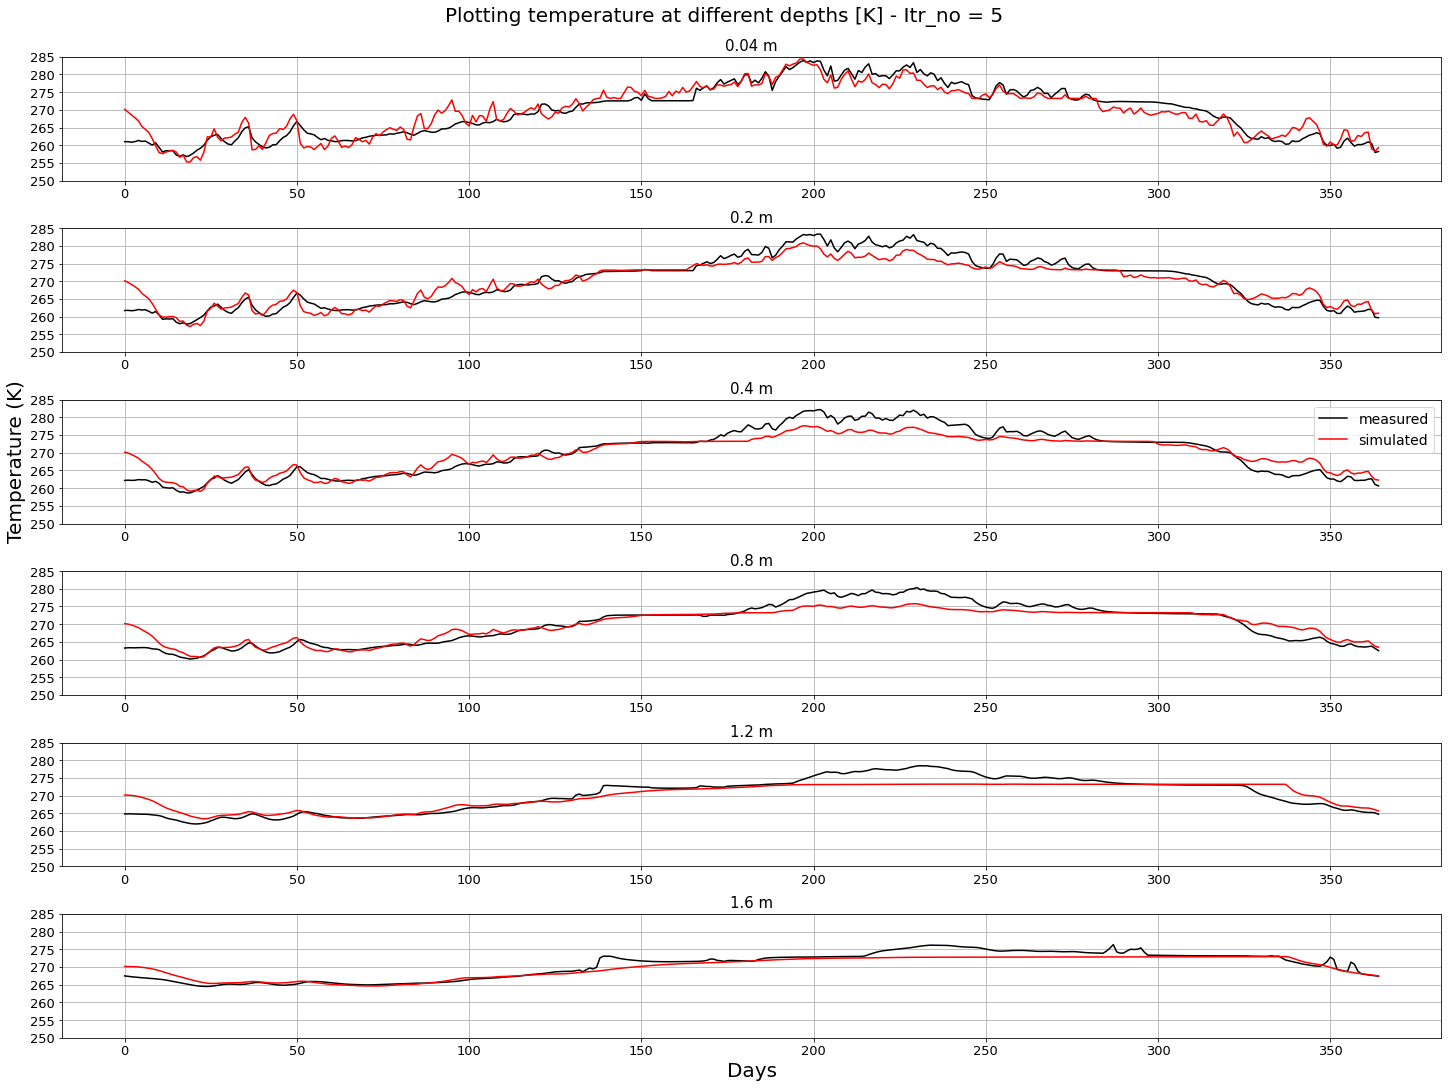

In [31]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim[x:x+365].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

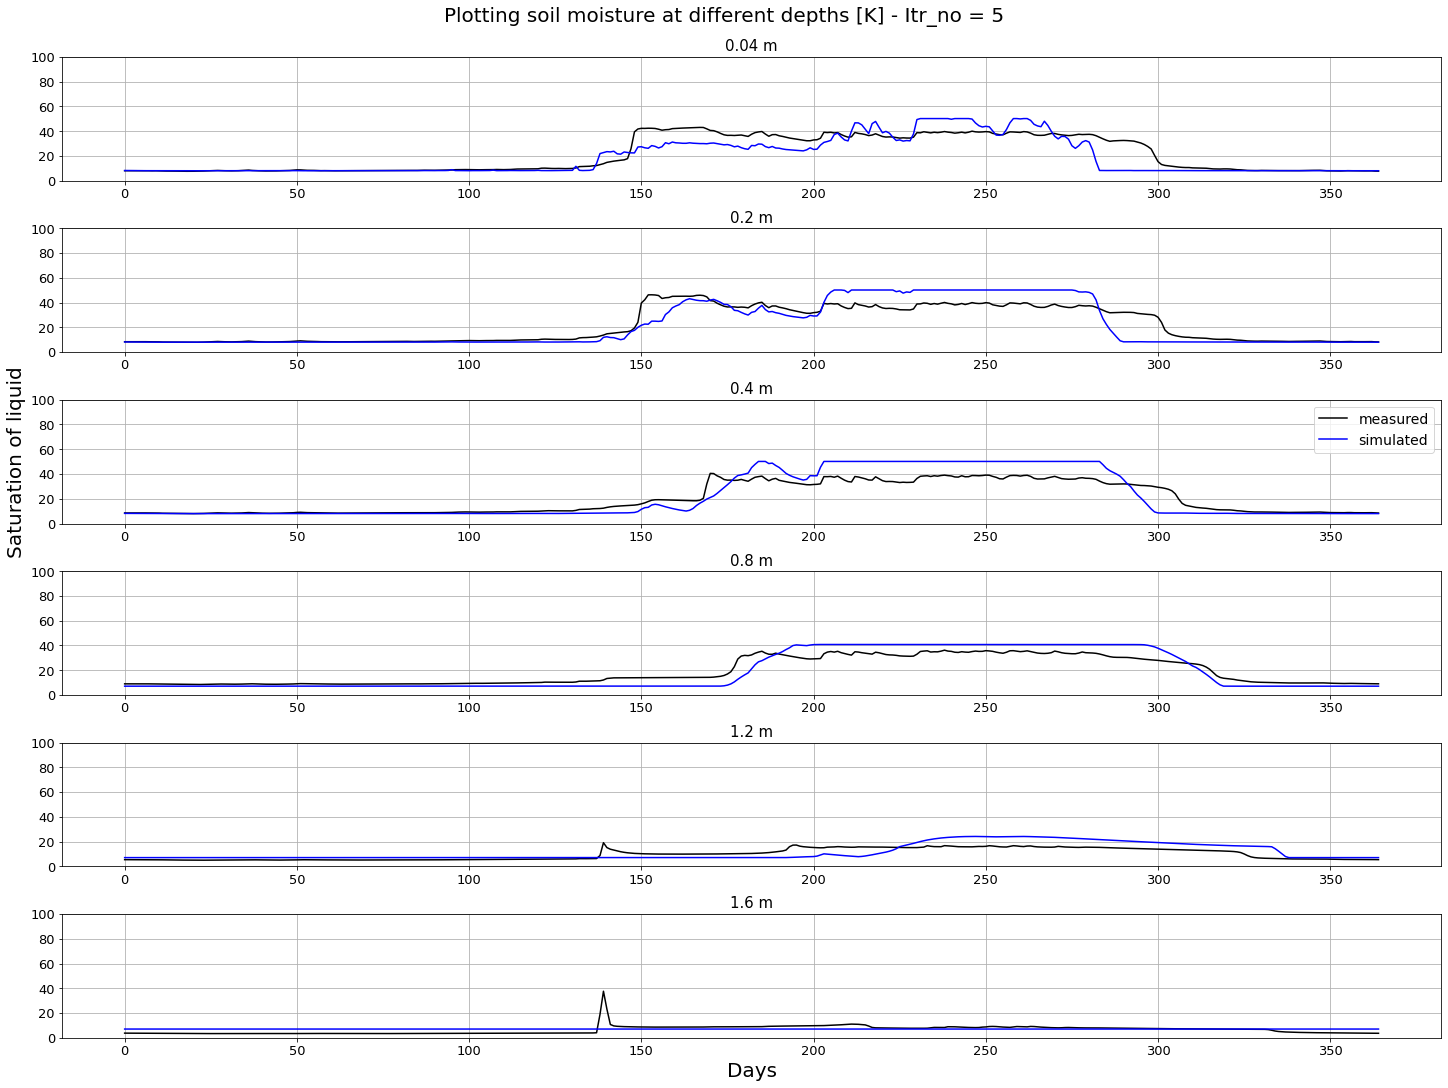

In [32]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim[x:x+365].values, 'b', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

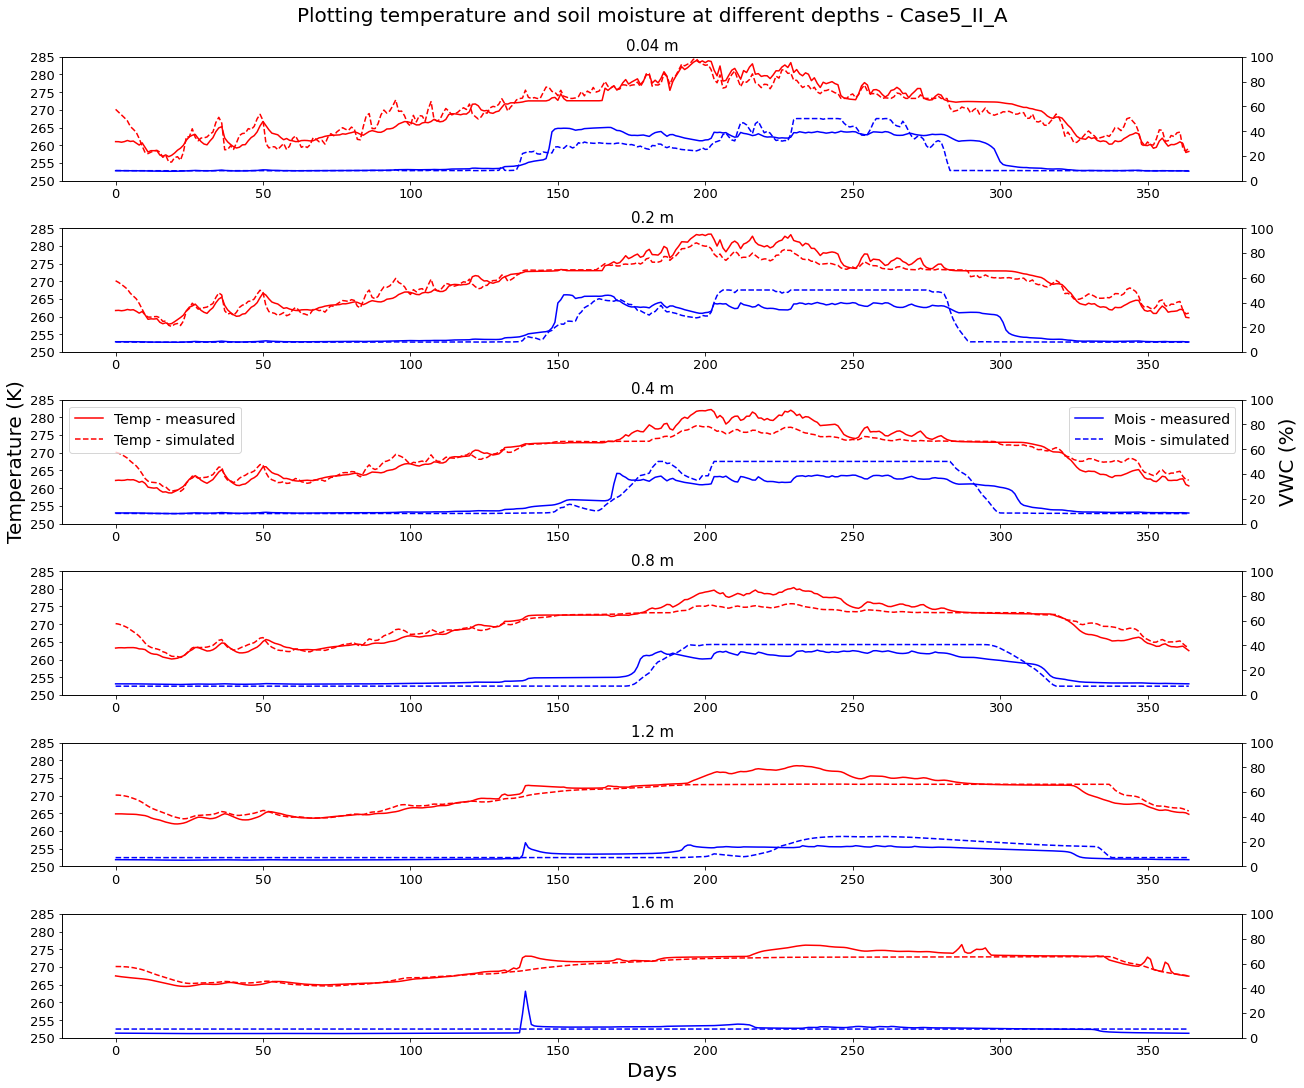

In [33]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature and soil moisture at different depths - Case5_II_A', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+365].values, 'r', label='Temp - measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim[x:x+365].values, 'r--', label='Temp - simulated')
    locals
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    #locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(time_period, mois_measured[x:x+365].values, 'b', label='Mois - measured')
    ax2.plot(time_period, mois_sim[x:x+365].values, 'b--', label='Mois - simulated')
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    ax2.set_ylim(0,100)
    
    x = x + 365
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
1. The moisture estimates have remained more or less the same.! - The model process needs to be defined more accurately, change of parameters, addition of parameters, ..
2. 

In [34]:
mois_measured[4519]

37.60354

<Figure size 720x432 with 0 Axes>

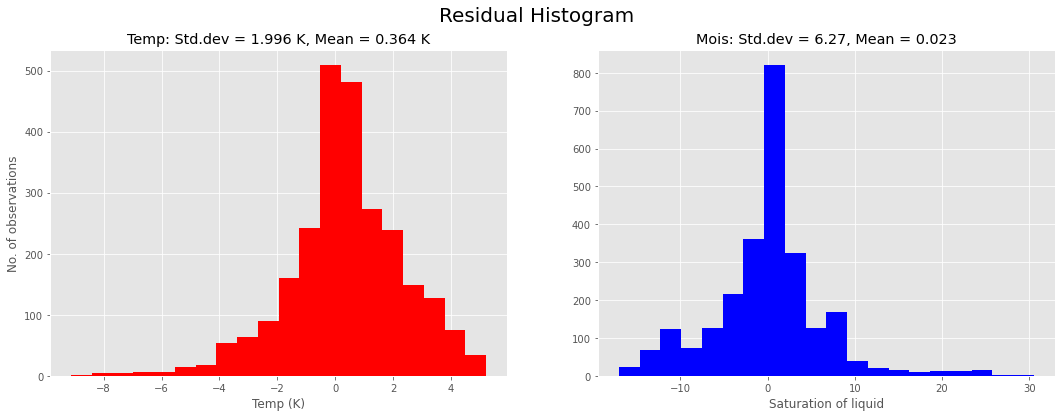

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Residual Histogram', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hist(temp_res, bins=20, color='r')
ax2.hist(mois_res, bins=20, color='b')
ax1.set_ylabel('No. of observations')
ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
ax1.set_xlabel('Temp (K)')
ax2.set_xlabel('Saturation of liquid')
plt.show()

**Comments:

1. The temperature observations show greater standard deviation compared to the moisture - Hence we need to consider to reweight the objective function. 
2.  The temperature is more or less equally distributed along the center. 
3. The moisture depicts a skew along the positive side of saturation of liquid. 

In [36]:
temp_res.describe()

count    2555.000000
mean        0.363847
std         1.995776
min        -9.126700
25%        -0.583718
50%         0.334741
75%         1.593403
max         5.220354
Name: Residual, dtype: float64

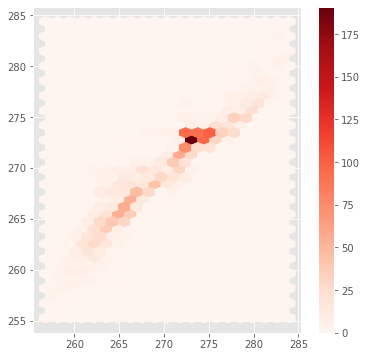

In [37]:
plt.figure(figsize=(6, 6))
plt.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

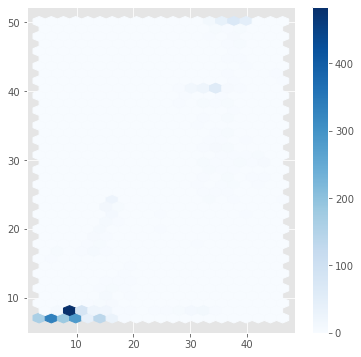

In [38]:
plt.figure(figsize=(6, 6))
plt.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Moisture')

<Figure size 720x432 with 0 Axes>

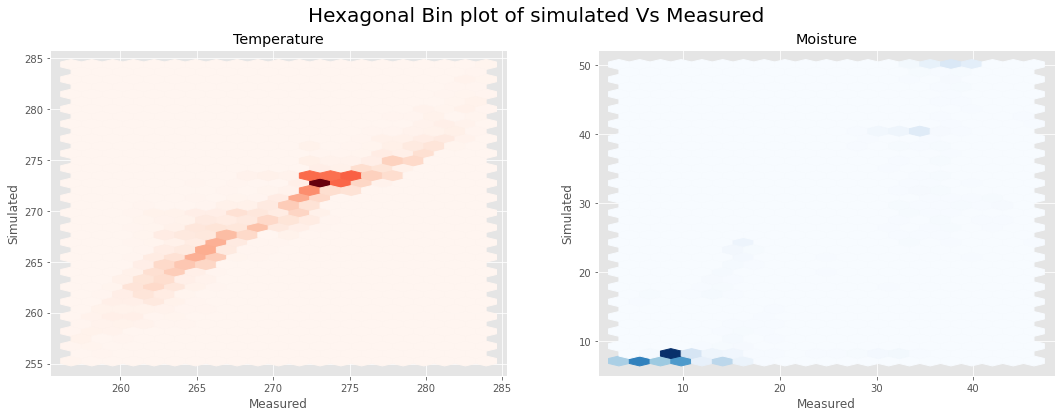

In [39]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hexagonal Bin plot of simulated Vs Measured', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
#plt.colorbar()
ax1.set_ylabel('Simulated')
ax1.set_xlabel('Measured')
ax1.set_title('Temperature')

ax2.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
ax2.set_ylabel('Simulated')
ax2.set_xlabel('Measured')
ax2.set_title('Moisture')

#plt.colorbar(cax=ax1)

#ax1.hist(temp_res, bins=20, color='r')
#ax2.hist(mois_res, bins=20, color='b')
#ax1.set_ylabel('No. of observations')
#ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
#ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
#ax1.set_xlabel('Temp (K)')
#ax2.set_xlabel('Saturation of liquid')
#img1 = ax1.imshow(fig)
#fig.colorbar(img1)

#### f. Relative contribution of temperature and moisture on the objective function

In [40]:
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.010244,0.010244,0,0.005122,0.005122
1,37,0.008632,0.008632,0,0.004833,0.003799
2,73,0.007417,0.007417,0,0.004520,0.002897
3,109,0.006782,0.006782,0,0.004345,0.002437
4,171,0.006761,0.006761,0,0.004342,0.002419
5,233,0.006267,0.006267,0,0.004248,0.002018


In [41]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

np.array(obj_itr_best[['temp','mois']])*1e6

array([4248.28, 2018.43])

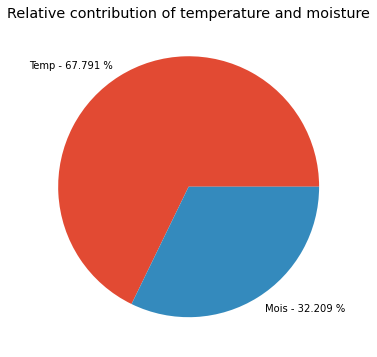

In [42]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

con_variables = np.array(obj_itr_best[['temp','mois']])/obj_itr_best['measurement_phi']*100

### To find the percentage contribution, we need subtract it with total_phi and multiply 

plt.figure(figsize=(6,6))
plt.title('Relative contribution of temperature and moisture')
mylabels=[f'Temp - {np.round(con_variables[0],3)} %',f'Mois - {np.round(con_variables[1],3)} %']
plt.pie(con_variables,labels=mylabels)
#plt.legend()
plt.show()
#plt.legend()

### How does the best parameters look like? Are they plausible? How do they compare with the other cases? Do we go for the case with optimal value or a case that shows more physical possibility?

In [43]:
itrno_best

5

### Exporting the values:

The values are mainly exported for the best iteration i.e. with the least objective function.

In [47]:
cf_name

'Case5_II_A_glm_cf_v1_rw'

#### 1. Parameters:

In [48]:
### Best parameters:
best_params = par_iteration.loc[itrno_best,:]
### Saving it as a csv file
best_params.to_csv(f'Final_comp_cases_data/best_params_{cf_name}.csv',sep=',')

#### 2. Residuals - Temperature and moisture

In [49]:
res_best.to_csv(f'Final_comp_cases_data/best_res_{cf_name}.csv',sep=',')

#### 3. Objective function

In [50]:
obj_iteration.to_csv(f'Final_comp_cases_data/obj_fn_{cf_name}.csv',sep=',')

#### 4. Parameter sensitivity - best

In [51]:
sen_best = sen_iteration.loc[itrno_best,:]
sen_best.to_csv(f'Final_comp_cases_data/best_sen_{cf_name}.csv',sep=',')

#### f. Identifibility tool - Identifiability is defined here as the capability of model calibration to constrain parameters used by a model.
- Go through the article and extract results later!

#### g. Plotting the covariance matrix for the variables